In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import mean_squared_error

plt.style.use("ggplot")
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [6]:
plt.rcParams["figure.figsize"] = (12, 6)

In [7]:
df = pd.read_csv("TCS_stock.csv")
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,28-Jun-23,3197.35,3208.0,3230.95,3193.40,3221.0,3215.45,3215.84,1575872.0,5.067756e+09,125121.0,1031195.00,65.44
1,TCS,EQ,30-Jun-23,3215.45,3220.0,3310.00,3214.10,3298.4,3302.25,3280.38,2672406.0,8.766501e+09,205777.0,1683039.00,62.98
2,TCS,EQ,03-Jul-23,3302.25,3314.3,3318.80,3268.75,3274.0,3272.30,3286.37,1687264.0,5.544970e+09,120543.0,1112511.00,65.94
3,TCS,EQ,04-Jul-23,3272.30,3290.0,3315.00,3277.30,3307.0,3308.85,3298.36,1656681.0,5.464337e+09,100235.0,965070.00,58.25
4,TCS,EQ,05-Jul-23,3308.85,3320.0,3329.00,3305.00,3322.0,3319.95,3318.57,1453008.0,4.821906e+09,92949.0,857588.00,59.02


In [8]:
df.index = pd.to_datetime(df["Date"])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover ₹,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2023-06-28,TCS,EQ,28-Jun-23,3197.35,3208.0,3230.95,3193.40,3221.0,3215.45,3215.84,1575872.0,5.067756e+09,125121.0,1031195.00,65.44
2023-06-30,TCS,EQ,30-Jun-23,3215.45,3220.0,3310.00,3214.10,3298.4,3302.25,3280.38,2672406.0,8.766501e+09,205777.0,1683039.00,62.98
2023-07-03,TCS,EQ,03-Jul-23,3302.25,3314.3,3318.80,3268.75,3274.0,3272.30,3286.37,1687264.0,5.544970e+09,120543.0,1112511.00,65.94
2023-07-04,TCS,EQ,04-Jul-23,3272.30,3290.0,3315.00,3277.30,3307.0,3308.85,3298.36,1656681.0,5.464337e+09,100235.0,965070.00,58.25
2023-07-05,TCS,EQ,05-Jul-23,3308.85,3320.0,3329.00,3305.00,3322.0,3319.95,3318.57,1453008.0,4.821906e+09,92949.0,857588.00,59.02


<AxesSubplot:xlabel='Date'>

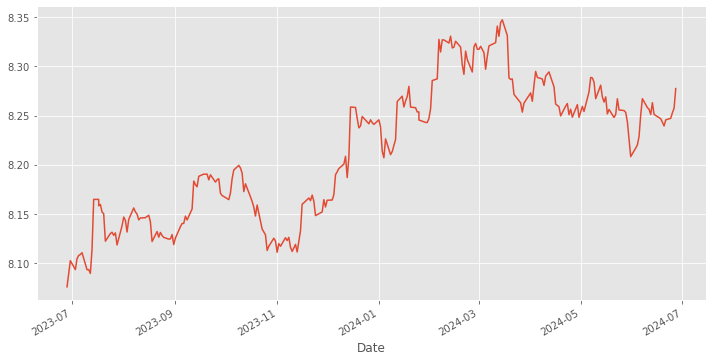

In [9]:
y = np.log(df["Close Price"])
y.plot()

In [10]:
pd.DataFrame(dict(low=y.resample("Q").min(), 
                  high=y.resample("Q").max(), 
                  first = y.resample("Q").first(), 
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

,low,high,first,last,median,mean
Date,,,,,,
2023-06-30,8.075723,8.102359,8.075723,8.102359,8.089041,8.089041
2023-09-30,8.089452,8.190396,8.093248,8.168656,8.142703,8.142786
2023-12-31,8.110923,8.258681,8.164468,8.241018,8.164439,8.171274
2024-03-31,8.207075,8.347413,8.245673,8.262636,8.287352,8.285020
2024-06-30,8.208206,8.294874,8.273018,8.277450,8.257716,8.259631


In [11]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y, 
                              rolling_mean = y.rolling(period).mean(), 
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(5)

,actual,rolling_mean,ewm
Date,,,
2023-06-28,8.075723,NaN,8.075723
2023-06-30,8.102359,NaN,8.093480
2023-07-03,8.093248,8.090443,8.093348
2023-07-04,8.104356,8.099988,8.099219
2023-07-05,8.107705,8.101770,8.103599


In [12]:
rolling_dropped = y_rolling.dropna()
print("rmse over rolling mean: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped.rolling_mean) ** 0.5)
print("rmse over ewma: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped["ewm"]) ** 0.5)

rmse over rolling mean:  0.00922215651463416
rmse over ewma:  0.007102334339059548


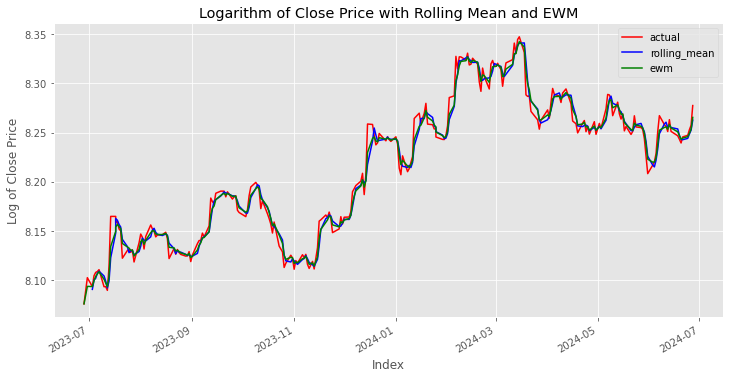

In [13]:
ax = y_rolling.plot(color={'actual': 'red', 'rolling_mean': 'blue', 'ewm': 'green'})
plt.xlabel('Index')
plt.ylabel('Log of Close Price')
plt.title('Logarithm of Close Price with Rolling Mean and EWM')
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.620235
p-value: 0.472606


In [15]:
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2023-06-28,8.075723,NaN,NaN
2023-06-30,8.102359,NaN,NaN
2023-07-03,8.093248,NaN,NaN
2023-07-04,8.104356,0.028633,NaN
2023-07-05,8.107705,0.005346,-0.023288
2023-07-06,8.108593,0.015345,0.009999
2023-07-07,8.110502,0.006146,-0.009198
2023-07-10,8.093141,-0.014564,-0.020710
2023-07-11,8.093279,-0.015314,-0.000751


In [16]:
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.605763
p-value: 0.000000


<AxesSubplot:xlabel='Date'>

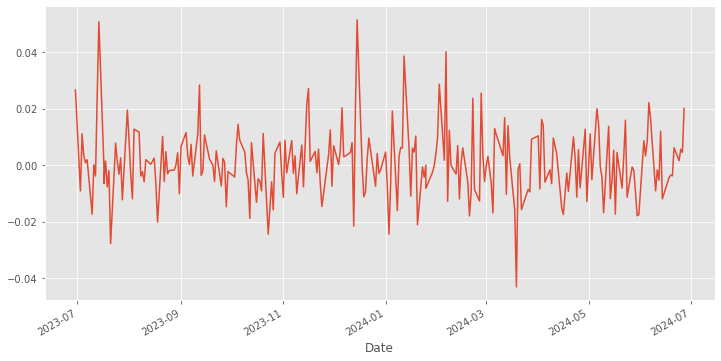

In [17]:
y.diff(periods=1).plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

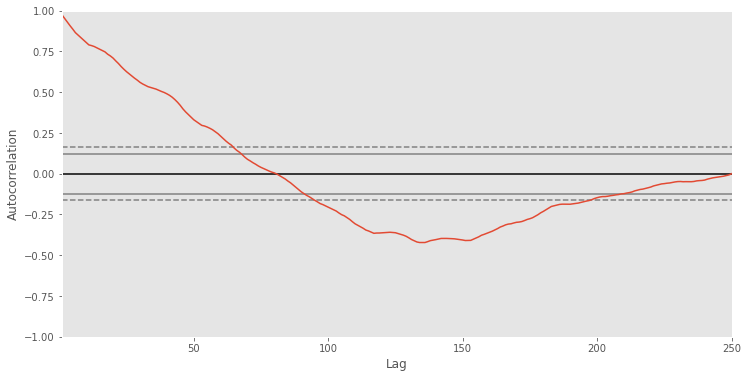

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Close Price   No. Observations:                  250
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 742.872
Date:                Sun, 30 Jun 2024   AIC                          -1473.743
Time:                        14:17:17   BIC                          -1452.639
Sample:                             0   HQIC                         -1465.248
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0479      0.073      0.656      0.512      -0.095       0.191
ar.L2         -0.0439      0.065     -0.673      0.501      -0.172       0.084
ar.L3          0.0292      0.077      0.379      0.7

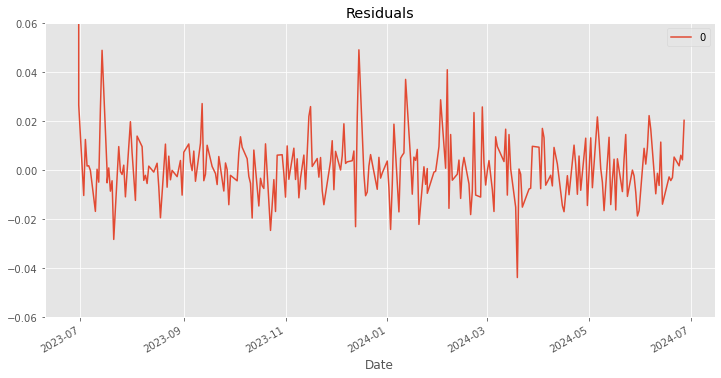

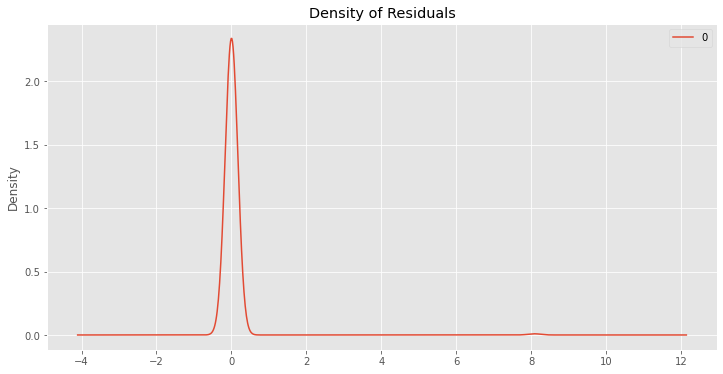

                0
count  250.000000
mean     0.033061
std      0.510852
min     -0.043796
25%     -0.007014
50%      0.000217
75%      0.007167
max      8.075723


In [19]:
y = np.log(df["Close Price"])

from statsmodels.tsa.arima.model import ARIMA
# Fit ARIMA model
model = ARIMA(y, order=(5, 1, 0))  # p, d, q
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

# Plotting residuals
ax1 = residuals.plot(title='Residuals')
ax1.set_ylim(-0.06, 0.06)
plt.show()

residuals.plot(kind='kde', title='Density of Residuals')
plt.show()

print(residuals.describe())


In [20]:
	
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Close Price   No. Observations:                  250
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 742.872
Date:                Sun, 30 Jun 2024   AIC                          -1473.743
Time:                        14:17:18   BIC                          -1452.639
Sample:                             0   HQIC                         -1465.248
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0479      0.073      0.656      0.512      -0.095       0.191
ar.L2         -0.0439      0.065     -0.673      0.501      -0.172       0.084
ar.L3          0.0292      0.077      0.379      0.705      -0.122       0.180
ar.L4         -0.0188      0.075     -0.251      0.802      -0.166       0.128
ar.L5          0.0577      0.074      0.779      0.436      -0.088       0.203
sigma2         0.0001    1.1e-05     13.593      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                62.14
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.57
Prob(H) (two-sided):                  0.78   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

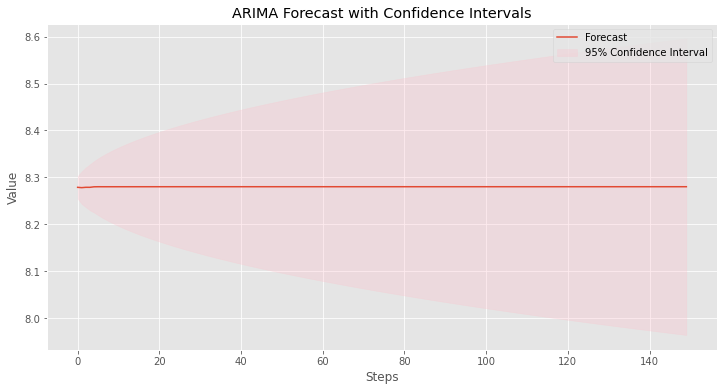

In [21]:
	
model = ARIMA(y.values, order=(5,1,0))
model_fit = model.fit()

# Get forecast
forecast_result = model_fit.forecast(steps=150)

# Extract predictions
predictions = forecast_result

# Extract confidence intervals
conf_interval = model_fit.get_forecast(steps=150).conf_int()

# Calculate forecast errors (you might need to adjust this based on your specific needs)
# Here, we're calculating the width of the confidence interval as a simple error measure
errors = (conf_interval[:, 1] - conf_interval[:, 0]) / 2

# Now you have separate variables for predictions, errors, and conf_interval

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Forecast')
plt.fill_between(range(len(predictions)), 
                 conf_interval[:, 0], 
                 conf_interval[:, 1], 
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('ARIMA Forecast with Confidence Intervals')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [22]:
	
predictions[:10]

array([8.27870692, 8.27800176, 8.27874098, 8.2787277 , 8.27981059,
       8.27997039, 8.27987554, 8.27993849, 8.27992924, 8.27998276])

In [23]:
errors[:10]

array([0.02400379, 0.03476915, 0.04233617, 0.04904346, 0.05478358,
       0.06051406, 0.06581741, 0.07067777, 0.07524701, 0.07954445])

In [24]:
conf_interval[:10]

array([[8.25470313, 8.30271071],
       [8.2432326 , 8.31277091],
       [8.23640481, 8.32107715],
       [8.22968424, 8.32777115],
       [8.225027  , 8.33459417],
       [8.21945633, 8.34048445],
       [8.21405813, 8.34569294],
       [8.20926072, 8.35061626],
       [8.20468223, 8.35517624],
       [8.20043831, 8.3595272 ]])

In [25]:
model.endog

array([[8.0757226 ],
       [8.10235933],
       [8.09324838],
       [8.10435598],
       [8.107705  ],
       [8.10859317],
       [8.11050233],
       [8.09314142],
       [8.09327894],
       [8.0894518 ],
       [8.11389074],
       [8.16469523],
       [8.16469523],
       [8.158144  ],
       [8.15961784],
       [8.15192428],
       [8.14997717],
       [8.12216345],
       [8.1299854 ],
       [8.13128068],
       [8.1280836 ],
       [8.13061853],
       [8.11832627],
       [8.13781972],
       [8.14672354],
       [8.14341569],
       [8.131516  ],
       [8.14425819],
       [8.15595069],
       [8.15208277],
       [8.14974615],
       [8.14383703],
       [8.14578162],
       [8.14608603],
       [8.14856133],
       [8.14199052],
       [8.12180712],
       [8.13201589],
       [8.12626688],
       [8.13101587],
       [8.12792126],
       [8.12601553],
       [8.12431355],
       [8.12449129],
       [8.1288654 ],
       [8.11874342],
       [8.12539427],
       [8.136

In [26]:
(predictions + 1.96 * errors)[:10]

array([8.32575435, 8.3461493 , 8.36171988, 8.37485287, 8.38718641,
       8.39857794, 8.40887765, 8.41846691, 8.42741337, 8.43588987])

In [27]:
(predictions - 1.96 * errors)[:10]

array([8.23165949, 8.20985422, 8.19576208, 8.18260252, 8.17243476,
       8.16136283, 8.15087342, 8.14141006, 8.13244511, 8.12407564])

C:\Users\Ankitha\AppData\Local\Temp\ipykernel_4896\3527287690.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, actual=%f' % (yhat, obs))


predicted=8.296500, actual=8.309997
predicted=8.311486, actual=8.320838
predicted=8.319670, actual=8.324179


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.323706, actual=8.340993
predicted=8.340663, actual=8.330623
predicted=8.329699, actual=8.344648
predicted=8.347514, actual=8.347413
predicted=8.345951, actual=8.331466


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.333138, actual=8.288358
predicted=8.286549, actual=8.286748
predicted=8.290288, actual=8.287264
predicted=8.286264, actual=8.271523
predicted=8.269874, actual=8.262946
predicted=8.261325, actual=8.253462
predicted=8.252488, actual=8.262636
predicted=8.263392, actual=8.273018
predicted=8.271481, actual=8.264569
predicted=8.263090, actual=8.280787
predicted=8.282279, actual=8.294874
predicted=8.294544, actual=8.288849
predicted=8.288967, actual=8.287163
predicted=8.287909, actual=8.280597
predicted=8.280872, actual=8.290205


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.292114, actual=8.294400


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.293112, actual=8.279241
predicted=8.278456, actual=8.261733
predicted=8.261706, actual=8.258940
predicted=8.260113, actual=8.249627
predicted=8.248445, actual=8.259613


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.259944, actual=8.262224
predicted=8.259928, actual=8.250894
predicted=8.250340, actual=8.256400
predicted=8.257133, actual=8.248359
predicted=8.247463, actual=8.261061


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.263031, actual=8.248176
predicted=8.245299, actual=8.259277
predicted=8.261591, actual=8.254113
predicted=8.252154, actual=8.274115
predicted=8.276089, actual=8.288773
predicted=8.287307, actual=8.288270
predicted=8.288792, actual=8.284050
predicted=8.284203, actual=8.267167
predicted=8.267931, actual=8.280914
predicted=8.283212, actual=8.269039
predicted=8.267395, actual=8.263694
predicted=8.264075, actual=8.268975


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.268002, actual=8.251690
predicted=8.251730, actual=8.256205
predicted=8.256354, actual=8.248058
predicted=8.246547, actual=8.251142
predicted=8.252253, actual=8.267051


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.265605, actual=8.255699
predicted=8.255144, actual=8.255062
predicted=8.255480, actual=8.253202
predicted=8.252866, actual=8.243716
predicted=8.245135, actual=8.225798
predicted=8.224842, actual=8.208206
predicted=8.207948, actual=8.216858
predicted=8.217377, actual=8.220134
predicted=8.218545, actual=8.228564


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.227701, actual=8.250725


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.249900, actual=8.267179
predicted=8.267829, actual=8.258086


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.257565, actual=8.256374
predicted=8.257297, actual=8.251051
predicted=8.251406, actual=8.263114


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.265198, actual=8.251155
predicted=8.249401, actual=8.246722


C:\Users\Ankitha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.247474, actual=8.243204
predicted=8.242386, actual=8.239395
predicted=8.240217, actual=8.245581
predicted=8.245295, actual=8.247168
predicted=8.246635, actual=8.252824
predicted=8.253046, actual=8.257347
predicted=8.256965, actual=8.277450
Test RMSE: 0.012


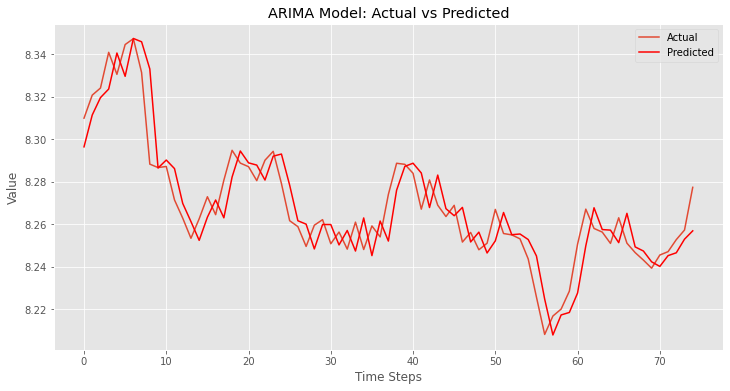

In [28]:
x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output  # forecast() now returns the prediction directly
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, actual=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % np.sqrt(error))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('ARIMA Model: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [29]:

result = pd.DataFrame(y)[train_size:]
result.columns = ["actual"]
result["prediction"] = predictions
result

,actual,prediction
Date,,
2024-03-06,8.309997,[8.29650006894063]
2024-03-07,8.320838,[8.311486181653205]
2024-03-11,8.324179,[8.319670248746865]
2024-03-12,8.340993,[8.323705710791192]
2024-03-13,8.330623,[8.340663401710817]
...,...,...
2024-06-21,8.245581,[8.240216531317976]
2024-06-24,8.247168,[8.245294890211389]
2024-06-25,8.252824,[8.246635399245447]
